# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1092.
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           9.74e-43
Time:                        11:47:08   Log-Likelihood:                 4.9470
No. Observations:                  50   AIC:                            -1.894
Df Residuals:                      46   BIC:                             5.754
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0098      0.078     64.324      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.47894225  4.98066834  5.4408231   5.83057833  6.13150976  6.33862415
  6.4611796   6.52116456  6.5496851   6.58185433  6.65102338  6.78330194
  6.99326847  7.28157504  7.63484017  8.02784738  8.42768817  8.79916884
  9.11059264  9.33896753  9.47378367  9.51874016  9.49113728  9.41903414
  9.3366386   9.27868705  9.2747373   9.34431232  9.49369268  9.71488466
  9.9869336  10.2793667  10.55719959 10.78668418 10.94085339 11.00395172
 10.9740239  10.86323607 10.69587696 10.5043673  10.32393319 10.18681856
 10.11698757 10.12618739 10.21201814 10.3583272  10.53786305 10.7167526
 10.86006646 10.93755772]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.91365809 10.75004183 10.46745298 10.11316467  9.74940491  9.4381211
  9.22581306  9.1321483   9.14514674  9.2241138 ]


## Plot comparison

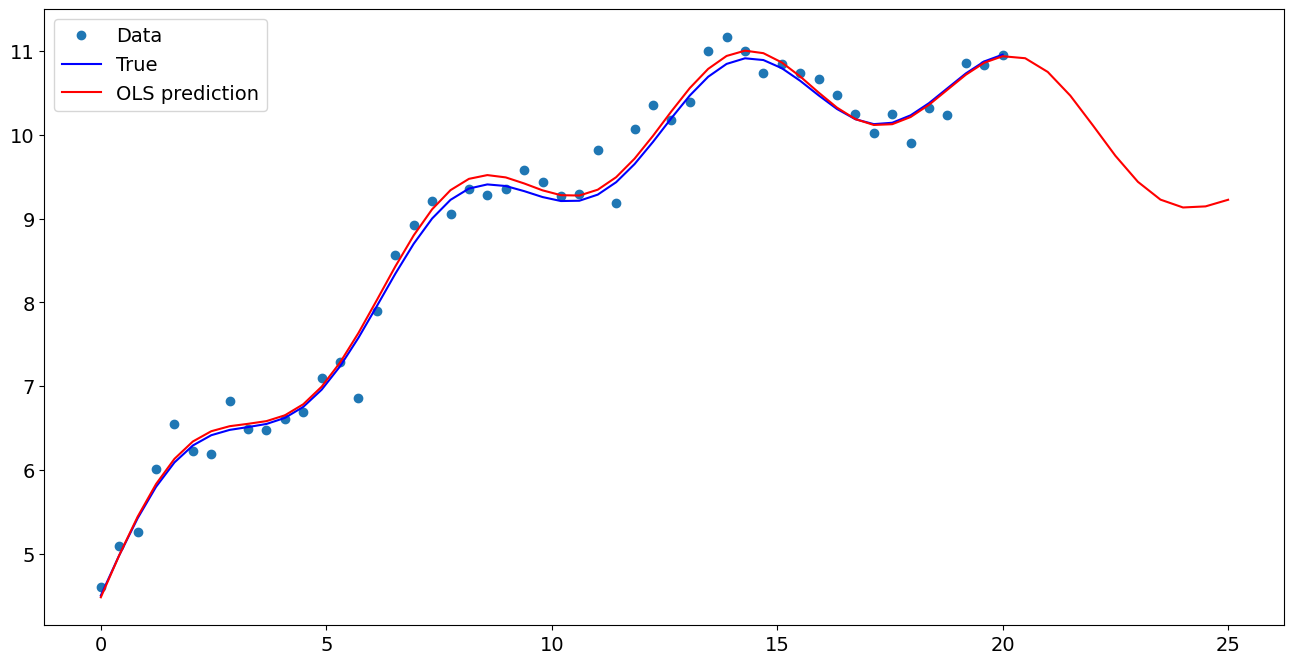

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.009831
x1                  0.511140
np.sin(x1)          0.528967
I((x1 - 5) ** 2)   -0.021236
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.913658
1    10.750042
2    10.467453
3    10.113165
4     9.749405
5     9.438121
6     9.225813
7     9.132148
8     9.145147
9     9.224114
dtype: float64